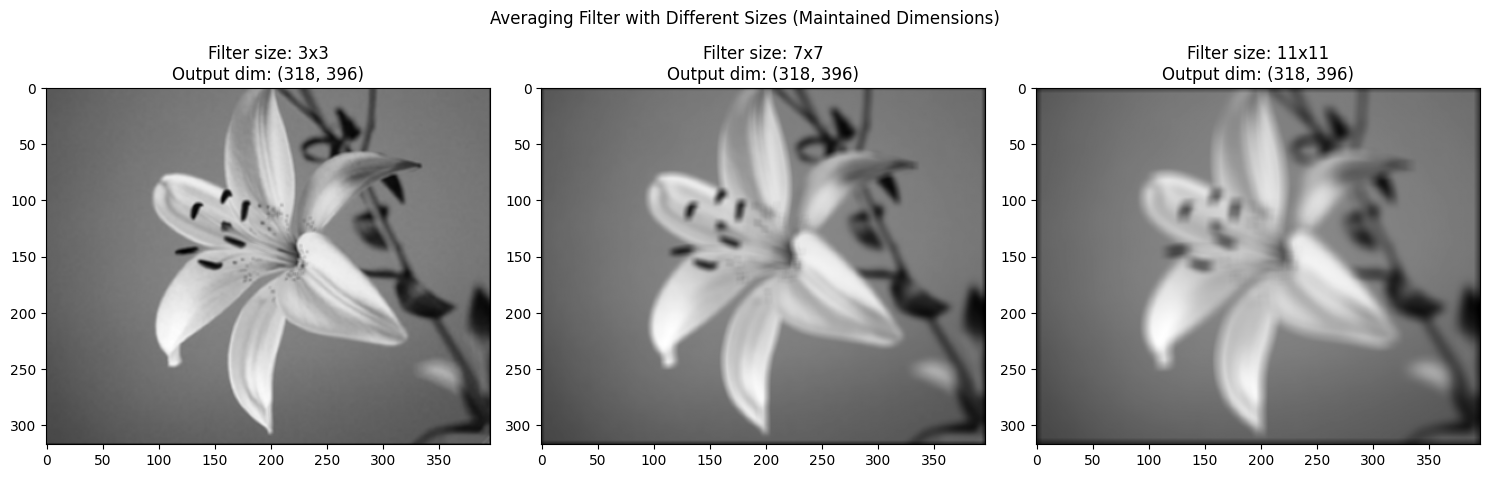

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from my_functions_tp02 import apply_filter_to_single_channel, get_L
from tools import Conv2D, add_padding

# 1. Read the image in grayscale
img = cv2.imread('flower.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image 'flower.png' not found. Please check the path.")

# 2. Define averaging filters of different sizes
def build_averaging_filter(size=3):
    return np.ones((size, size)) / (size * size)

#  Convolution Experiments

# 3. Experiment with different filter sizes (with padding to maintain dimensions)
plt.figure(figsize=(15, 5))
filter_sizes = [3, 7, 11]
for i, size in enumerate(filter_sizes):
    kernel = build_averaging_filter(size)
    # Calculate padding needed to maintain dimensions
    padding = (size-1)//2
    padded_img = add_padding(img, (padding, padding))
    filtered = Conv2D(padded_img, kernel)
    plt.subplot(1, len(filter_sizes), i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f"Filter size: {size}x{size}\nOutput dim: {filtered.shape}")
plt.suptitle("Averaging Filter with Different Sizes (Maintained Dimensions)")
plt.tight_layout()
plt.show()



In [2]:
# 4. Application des filtres de Sobel et calcul du gradient
Gx = get_Gx(img_gray)
Gy = get_Gy(img_gray)
grad_mag = module_grad(img_gray)
grad_dir = direct_grad(img_gray)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1); plt.imshow(Gx, cmap='gray'); plt.title("Gx (Dérivée horizontale)")
plt.subplot(2, 2, 2); plt.imshow(Gy, cmap='gray'); plt.title("Gy (Dérivée verticale)")
plt.subplot(2, 2, 3); plt.imshow(grad_mag, cmap='gray'); plt.title("Magnitude du gradient)")
plt.subplot(2, 2, 4); plt.imshow(grad_dir, cmap='hsv'); plt.title("Direction du gradient)")
plt.tight_layout()
plt.show()



NameError: name 'get_Gx' is not defined

In [ ]:
# 4. Experiment with stride (no padding)
plt.figure(figsize=(15, 5))
strides = [2, 5, 11]
kernel = build_averaging_filter(3)  # Using 3x3 kernel for stride experiments
for i, stride in enumerate(strides):
    filtered = Conv2D(img, kernel, stride=(stride, stride), padding=(0, 0))
    plt.subplot(1, len(strides), i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f"Stride: {stride}\nOutput dim: {filtered.shape}")
plt.suptitle("Effect of Stride (No Padding)")
plt.tight_layout()
plt.show()



In [ ]:
# 5. Experiment with dilation (no padding)
plt.figure(figsize=(15, 5))
dilations = [1, 3, 5]
kernel = build_averaging_filter(3)  # Using 3x3 kernel for dilation experiments
for i, dilation in enumerate(dilations):
    filtered = Conv2D(img, kernel, dilation=(dilation, dilation), padding=(0, 0))
    plt.subplot(1, len(dilations), i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f"Dilation: {dilation}\nOutput dim: {filtered.shape}")
plt.suptitle("Effect of Dilation (No Padding)")
plt.tight_layout()
plt.show()



In [ ]:
# 6. Combine different variants
plt.figure(figsize=(15, 10))
combinations = [
    {'kernel_size': 3, 'stride': 2, 'dilation': 1, 'padding': 0},
    {'kernel_size': 7, 'stride': 1, 'dilation': 2, 'padding': 3},
    {'kernel_size': 5, 'stride': 3, 'dilation': 1, 'padding': 2},
    {'kernel_size': 11, 'stride': 1, 'dilation': 1, 'padding': 5}
]

for i, params in enumerate(combinations):
    kernel = build_averaging_filter(params['kernel_size'])
    if params['padding'] > 0:
        input_img = add_padding(img, (params['padding'], params['padding']))
    else:
        input_img = img
    filtered = Conv2D(input_img, kernel, 
                     stride=(params['stride'], params['stride']),
                     dilation=(params['dilation'], params['dilation']))
    plt.subplot(2, 2, i+1)
    plt.imshow(filtered, cmap='gray')
    title = f"K:{params['kernel_size']}x{params['kernel_size']}, "
    title += f"S:{params['stride']}, D:{params['dilation']}, P:{params['padding']}\n"
    title += f"Output: {filtered.shape}"
    plt.title(title)
plt.suptitle("Combined Convolution Variants")
plt.tight_layout()
plt.show()



In [ ]:
# ========== Part 2: Laplacian Filter ==========

# 7. Apply Laplacian filter
laplacian = get_L(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Filter Result")
plt.tight_layout()
plt.show()

# 8. Zero-crossing detection
def zero_crossing(laplacian, threshold=10):
    zero_crossings = np.zeros_like(laplacian)
    rows, cols = laplacian.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            window = laplacian[i-1:i+2, j-1:j+2]
            max_val = np.max(window)
            min_val = np.min(window)
            if max_val > 0 and min_val < 0 and (max_val - min_val) > threshold:
                zero_crossings[i, j] = 255
    return zero_crossings

edges = zero_crossing(laplacian)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Filter")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Zero-crossing Edges")
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from scipy import ndimage

# 1. Gaussian smoothing implementation (as given in the assignment)
sigma = 1.0  # You can change this value
img = np.random.rand(100, 100)  # Replace with your actual image
blurred_img = ndimage.gaussian_filter(img, sigma)

# 2. Compute gradients (needed for NMS)
grad_x = ndimage.sobel(blurred_img, axis=0)
grad_y = ndimage.sobel(blurred_img, axis=1)
grad_mag = np.hypot(grad_x, grad_y)
grad_dir = np.arctan2(grad_y, grad_x)

# 3. Non-Maxima Suppression (NMS) implementation
nms_image = np.zeros_like(grad_mag)
angles = grad_dir % np.pi

# Pad the gradient magnitude for border handling
padded = np.pad(grad_mag, ((1,1), (1,1)), mode='constant')

for i in range(1, grad_mag.shape[0]+1):
    for j in range(1, grad_mag.shape[1]+1):
        angle = angles[i-1, j-1]
        current = padded[i, j]
        
        # Determine neighbors based on gradient direction
        if 0 <= angle < np.pi/4 or np.pi*7/8 <= angle < np.pi:
            neighbors = (padded[i, j+1], padded[i, j-1])
        elif np.pi/4 <= angle < 3*np.pi/8:
            neighbors = (padded[i-1, j+1], padded[i+1, j-1])
        elif 3*np.pi/8 <= angle < 5*np.pi/8:
            neighbors = (padded[i-1, j], padded[i+1, j])
        elif 5*np.pi/8 <= angle < 7*np.pi/8:
            neighbors = (padded[i-1, j-1], padded[i+1, j+1])
        
        # Suppress non-maxima
        if current >= max(neighbors):
            nms_image[i-1, j-1] = current

# The result is in nms_image

In [6]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def non_max_suppression(grad_mag, grad_dir):
    """
    Implements Non-Maxima Suppression as specified in the homework requirements
    
    Args:
        grad_mag: Matrix of gradient magnitudes
        grad_dir: Matrix of gradient directions (in radians)
    
    Returns:
        nms_image: Image with only local maxima preserved
    """
    nms_image = np.zeros_like(grad_mag)
    angles = grad_dir % np.pi  # Convert angles to [0, π] range
    
    # Pad the gradient magnitude for border handling
    padded = np.pad(grad_mag, ((1,1), (1,1)), mode='constant')
    
    for i in range(1, grad_mag.shape[0]+1):
        for j in range(1, grad_mag.shape[1]+1):
            angle = angles[i-1, j-1]
            current = padded[i, j]
            
            # Define the four regions exactly as specified
            if np.pi/4 <= angle < np.pi/2:  # Region 1
                neighbors = (padded[i-1, j+1], padded[i+1, j-1])
            elif np.pi/2 <= angle < 3*np.pi/4:  # Region 2
                neighbors = (padded[i-1, j], padded[i+1, j])
            elif 3*np.pi/4 <= angle < np.pi:  # Region 3
                neighbors = (padded[i-1, j-1], padded[i+1, j+1])
            else:  # Region 0 (0 ≤ θ < π/4)
                neighbors = (padded[i, j+1], padded[i, j-1])
            
            # Suppress non-maxima
            if current >= max(neighbors):
                nms_image[i-1, j-1] = current
                
    return nms_image

In [7]:
# Load and prepare image (example with a flower image)
from skimage import data
flower = data.astronaut()  # Using a built-in image for demonstration
gray_flower = np.mean(flower, axis=2) if len(flower.shape) == 3 else flower

# Test different sigma values
sigmas = [0.5, 1.0, 2.0]

plt.figure(figsize=(15, 8))
for i, sigma in enumerate(sigmas):
    # 1. Apply Gaussian smoothing (BEFORE NMS as required)
    blurred = ndimage.gaussian_filter(gray_flower, sigma)
    
    # 2. Compute gradients
    grad_x = ndimage.sobel(blurred, axis=0)
    grad_y = ndimage.sobel(blurred, axis=1)
    grad_mag = np.hypot(grad_x, grad_y)
    grad_dir = np.arctan2(grad_y, grad_x)
    
    # 3. Apply NMS
    nms_result = non_max_suppression(grad_mag, grad_dir)
    
    # 4. Apply smoothing AFTER NMS (for comparison)
    nms_then_blur = ndimage.gaussian_filter(nms_result, sigma)
    
    # Visualization
    plt.subplot(3, 4, i*4+1)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'σ={sigma}\nBlurred Before NMS')
    plt.axis('off')
    
    plt.subplot(3, 4, i*4+2)
    plt.imshow(grad_mag, cmap='gray')
    plt.title('Gradient Magnitude')
    plt.axis('off')
    
    plt.subplot(3, 4, i*4+3)
    plt.imshow(nms_result, cmap='gray')
    plt.title('After NMS')
    plt.axis('off')
    
    plt.subplot(3, 4, i*4+4)
    plt.imshow(nms_then_blur, cmap='gray')
    plt.title('NMS then Blurred')
    plt.axis('off')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'skimage'

In [8]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -----------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import shutil

# Remplace "mon_dossier" par le nom de ton dossier
shutil.make_archive("mon_dossier_archive", "zip", "TRAITEMENT")


FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: 'TRAITEMENT'

In [2]:
!zip -r mon_dossier.zip TRAITEMENT/


	zip warning: name not matched: TRAITEMENT/

zip error: Nothing to do! (try: zip -r mon_dossier.zip . -i TRAITEMENT/)


In [3]:
!pwd
!ls


/c/Users/Admin/TRAITEMENT
TP03.ipynb
TP2EX2.ipynb
__pycache__
flower.png
lab2.ipynb
my_functions_tp02.py
red_bird.png
tools.py
